In [32]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [33]:
# 加载波士顿房价数据集
dataset = pd.read_csv('../dataset/HousingData.csv')

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用均值填充 NaN 值
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

不同算法比较 
评价指标mse rmse r2 mae

In [34]:
#MLP
mlp_model = MLPRegressor(hidden_layer_sizes = (100, 50), max_iter = 1000, random_state = 42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

In [35]:
#SVM
svm_model = SVR(kernel = 'rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

In [36]:
#DecisionTree
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [37]:
#Adaboost
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 400, random_state = 42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

In [38]:
#RandomForest
rf_model = RandomForestRegressor(n_estimators = 400, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

画图

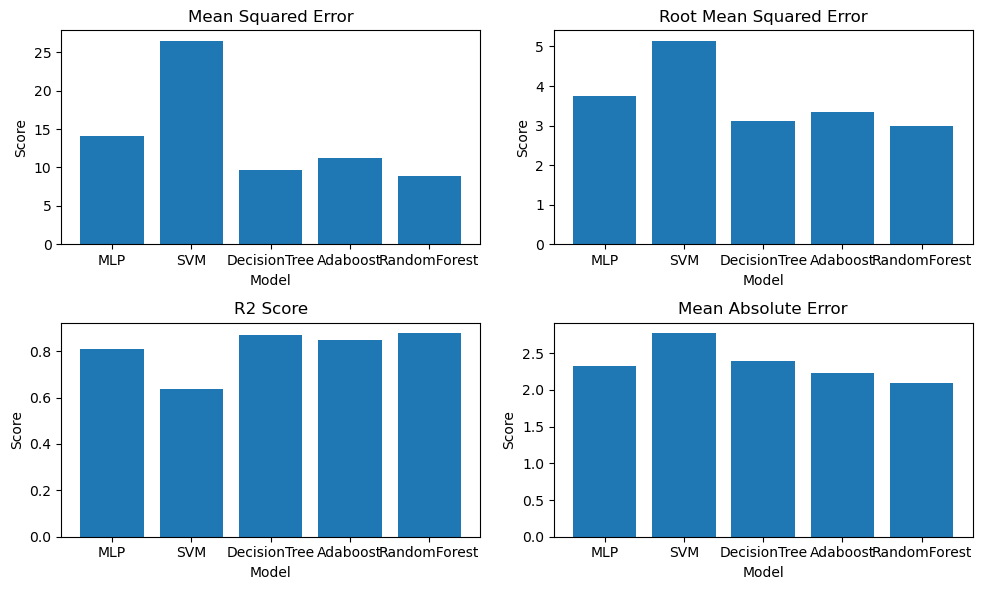

In [40]:
models = ['MLP', 'SVM', 'DecisionTree', 'Adaboost', 'RandomForest']
mse_scores = [mse_mlp, mse_svm, mse_dt, mse_ada, mse_rf]
rmse_scores = [rmse_mlp, rmse_svm, rmse_dt, rmse_ada, rmse_rf]
r2_scores = [r2_mlp, r2_svm, r2_dt, r2_ada, r2_rf]
mae_scores = [mae_mlp, mae_svm, mae_dt, mae_ada, mae_rf]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mse_scores)
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Score')

plt.subplot(2, 2, 2)
plt.bar(models, rmse_scores)
plt.title('Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
plt.bar(models, r2_scores)
plt.title('R2 Score')
plt.xlabel('Model')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.bar(models, mae_scores)
plt.title('Mean Absolute Error')
plt.xlabel('Model')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

在默认参数下 随机森林算法表现最好